# 1. Importando bibliotecas a serem utilizadas

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pergunta: "Vamos investir 75k em marketing, qual deve ser o estoque enviado a loja?"

# 2. Importando bases de dados

In [5]:
#Importando a base de dados

df= pd.read_excel('Investimento_x_Venda.xlsx')

In [6]:
#Exibindo as primeiras 5 linhas do dataset
df.head(5)

,Investimento em marketing,Venda Qtd
0,20,118
1,25,142
2,40,225
3,52,260
4,67,295


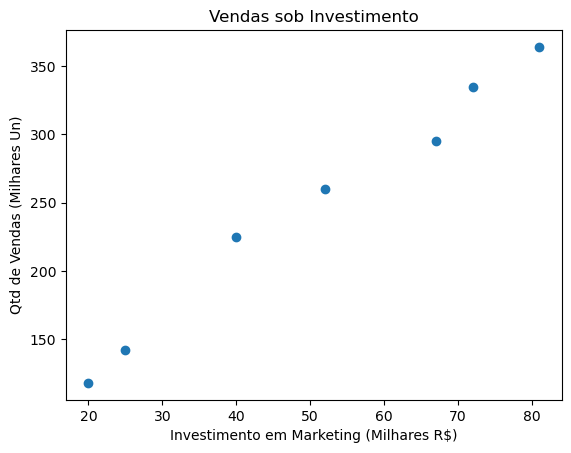

In [10]:
#Exibindo de forma grafica os dados da base usando o scatterplot, entre dois figures (Investimento x Qtd de Vendas)
plt.scatter(df["Investimento em marketing"],df["Venda Qtd"])
plt.xlabel("Investimento em Marketing (Milhares R$)")
plt.ylabel("Qtd de Vendas (Milhares Un)")
plt.title("Vendas sob Investimento")
plt.show()

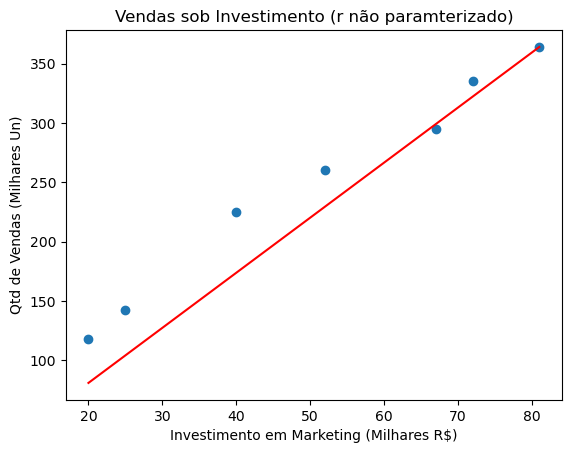

In [11]:
#Inserindo uma reta com base na equação de reta
plt.scatter(df["Investimento em marketing"], df["Venda Qtd"])
x0 = df["Investimento em marketing"][0]
y0 = df["Venda Qtd"][0]
x1 = df["Investimento em marketing"][6]
y1 = df["Venda Qtd"][6]
plt.plot([x0,x1], [x1,y1], "r")
plt.xlabel("Investimento em Marketing (Milhares R$)")
plt.ylabel("Qtd de Vendas (Milhares Un)")
plt.title("Vendas sob Investimento (r não paramterizado)")
plt.show()

# Aqui vemos que a relação entre "Investimento mkt" e "Qtd de Produto" é linear, ou seja, poderíamos calcular a previsão de vendas para um determinado investimento a partir da equação da reta. Mas não é isso que faremos.

# 3. Usando Machine Learning para descobrir a previsão de vendas.

In [14]:
#Importando modelo
from sklearn import linear_model

In [15]:
#Definindo o modelo de regressão 
reg = linear_model.LinearRegression()

In [16]:
#Inserindo atributos
reg.fit(df["Investimento em marketing"].values.reshape(-1, 1),df['Venda Qtd'])

#Aqui usamos o modo value.reshape pois, o atributo coluna é uma serie, e quando falamos em series, tbm estamos trazendo para dentro da nossa coluna
#o valor do indice, ou seja, toda coluna, tem um indice. Por isso, precisamos, nesse caso, inserir o parametro values.reshape. Pois assim
#Estaremos falando somente dos valores da coluna referenciada.

LinearRegression()

In [17]:
#Definindo os coeficientes da reta: Coenficiente angular
reg.coef_

array([3.90643623])

In [18]:
#Coeficiente linear
reg.intercept_

49.200323514387804

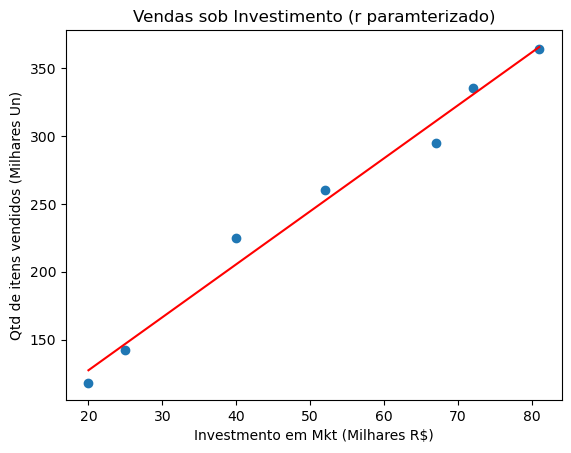

In [19]:
#Traçando uma reta com base nos novos parametros. Utilizando os parametros acima, chegamos na melhor reta para traçar nosso
#Modelo preditivo.

plt.scatter(df['Investimento em marketing'], df["Venda Qtd"])
x = np.array(df["Investimento em marketing"])
y = reg.intercept_ + x*reg.coef_
plt.xlabel("Investmento em Mkt (Milhares R$)")
plt.ylabel("Qtd de itens vendidos (Milhares Un)")
plt.title("Vendas sob Investimento (r paramterizado)")
plt.plot(x,y,"r")
plt.show()

In [27]:
#Usando a função predict para prever as vendas com base nos valores de investimentos

reg.predict([[75]])

array([342.18304104])

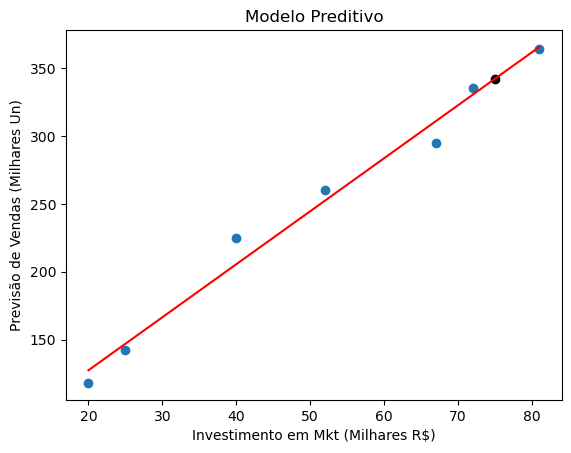

In [34]:
#Traçando o gráfico com base nos valores encontrados:

plt.scatter(df['Investimento em marketing'], df["Venda Qtd"])
plt.scatter(75, reg.predict([[75]])[0], color = "k")
x = np.array(df["Investimento em marketing"])
y = reg.intercept_ + x*reg.coef_
plt.xlabel("Investimento em Mkt (Milhares R$)")
plt.ylabel("Previsão de Vendas (Milhares Un)")
plt.title("Modelo Preditivo")
plt.plot(x,y,"r")
plt.show()

# Conclusão: Ao investirmos 75k em Marketing, devemos suportar o estoque da loja com 342k unidades de produto.